In [47]:
import numpy as np
from matplotlib import pyplot as plt

In [48]:
def time2freq():
    global time_x, time_y
    global freq_x, freq_y

    d = np.diff(time_x).mean()
    shift_time = time_x[0]

    freq_y = np.fft.fft(time_y)
    freq_x = np.fft.fftfreq(len(freq_y),d = d)
    freq_y *= np.exp(-2j*np.pi*freq_x*shift_time)

    freq_y = np.fft.fftshift(freq_y)
    freq_x = np.fft.fftshift(freq_x)

def freq2time(start_time=0,refer_time_x=False):
    global time_x, time_y
    global freq_x, freq_y

    freq_y_mem = freq_y.copy()

    if refer_time_x: start_time = time_x[0]
    sampling_freq = (np.max(freq_x) - np.min(freq_x))*len(freq_x)/(len(freq_x)-1)
    duration = (len(freq_x)-1.0)/(np.max(freq_x) - np.min(freq_x))
    time_x = np.linspace(0,duration,len(freq_x)) + start_time
    freq_y_mem = freq_y_mem*np.exp(2j*np.pi*freq_x*start_time)    

    freq_y_shift = np.fft.ifftshift(freq_y_mem)
    time_y = np.fft.ifft(freq_y_shift)


8nm 1545.3nm パルスってどんな電場プロファイル?

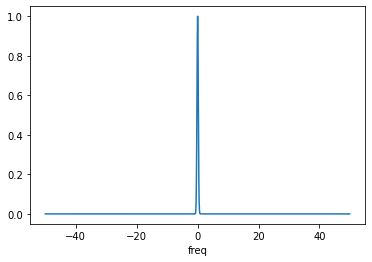

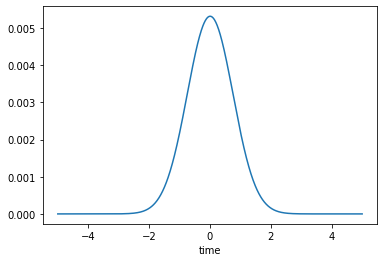

In [49]:
freq_x = np.fft.fftfreq(1000,d = 0.01)
freq_x = np.fft.fftshift(freq_x)
freq_y = np.exp(-(freq_x/0.3)**2)

plt.plot(freq_x, freq_y)
plt.xlabel('freq')
plt.show()

freq2time(start_time=-5)

plt.plot(time_x, time_y.real)
plt.xlabel('time')
plt.show()

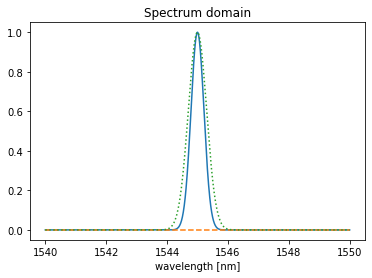

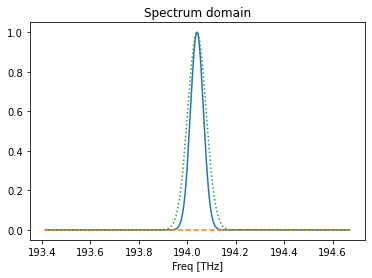

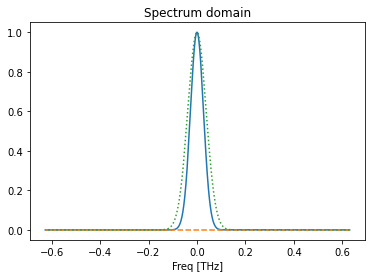

In [50]:
wavelength_range = np.linspace(1540,1550, 1000)
c = 299792458
freq_range = c/ (wavelength_range*1E-9)/1E12
bandwidth = 0.5
center_wavelength = 1545
center_freq = c/ (center_wavelength*1E-9)/1E12
power = np.exp(-((wavelength_range- center_wavelength)/(0.5*bandwidth))**2*np.log(2))
phase = 0*wavelength_range
electric_field = np.sqrt(power)

plt.plot(wavelength_range, power)
plt.plot(wavelength_range, phase,linestyle = "dashed",)
plt.plot(wavelength_range, electric_field, linestyle = "dotted")
plt.title('Spectrum domain')
plt.xlabel('wavelength [nm]')
plt.show()

plt.plot(freq_range, power)
plt.plot(freq_range, phase,linestyle = "dashed",)
plt.plot(freq_range, electric_field, linestyle = "dotted")
plt.title('Spectrum domain')
plt.xlabel('Freq [THz]')
plt.show()

shifted_freq_range = freq_range - center_freq

plt.plot(shifted_freq_range, power)
plt.plot(shifted_freq_range, phase,linestyle = "dashed",)
plt.plot(shifted_freq_range, electric_field, linestyle = "dotted")
plt.title('Spectrum domain')
plt.xlabel('Freq [THz]')
plt.show()



